In [1]:
# !curl https://sdk.cloud.google.com | bash

In [2]:
# !gcloud init

In [3]:
import os
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
from  utils import non_max_suppression
import matplotlib.pyplot as plt
import cv2
import numpy as np
import time
import seaborn as sns

2022-04-01 09:51:02.490547: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [4]:
localization_model=tf.keras.models.load_model('/home/phillip/work/yolov5/runs/train/exp23/weights/last_saved_model')

2022-04-01 09:51:15.121408: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-04-01 09:51:15.122762: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-04-01 09:51:17.387093: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-01 09:51:17.387956: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2022-04-01 09:51:17.388005: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-04-01 09:51:17.470861: I tensorflow/stream_executor/platform/default/dso_lo

In [5]:
classes=[]
imgs=[]
for img in os.listdir('/home/phillip/work/cvc2/data7/train/negative'):
    imgs.append(img)
    classes.append(0)
negative=pd.DataFrame({'image_paths':imgs,'classes':classes})


In [6]:
classes=[]
imgs=[]
for img in os.listdir('/home/phillip/work/cvc2/data7/train/positive'):
    imgs.append(img)
    classes.append(1)
positive=pd.DataFrame({'image_paths':imgs,'classes':classes})

In [7]:
negative['image_paths']=negative.image_paths.apply(lambda x: '/home/phillip/work/cvc2/data7/train/negative/'+x)
positive['image_paths']=positive.image_paths.apply(lambda x: '/home/phillip/work/cvc2/data7/train/positive/'+x)

In [8]:
# cv2.imread('/content/drive/MyDrive/new_cancer/data7/train/positive/M102_1566991978880.png')

2022-04-01 09:51:48.846468: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-04-01 09:51:48.855316: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2299995000 Hz
2022-04-01 09:51:49.653549: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-04-01 09:51:51.360462: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2022-04-01 09:51:51.448397: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2022-04-01 09:51:52.055662: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
/home/phillip/work/cvc2/utils.py:118: FutureWar

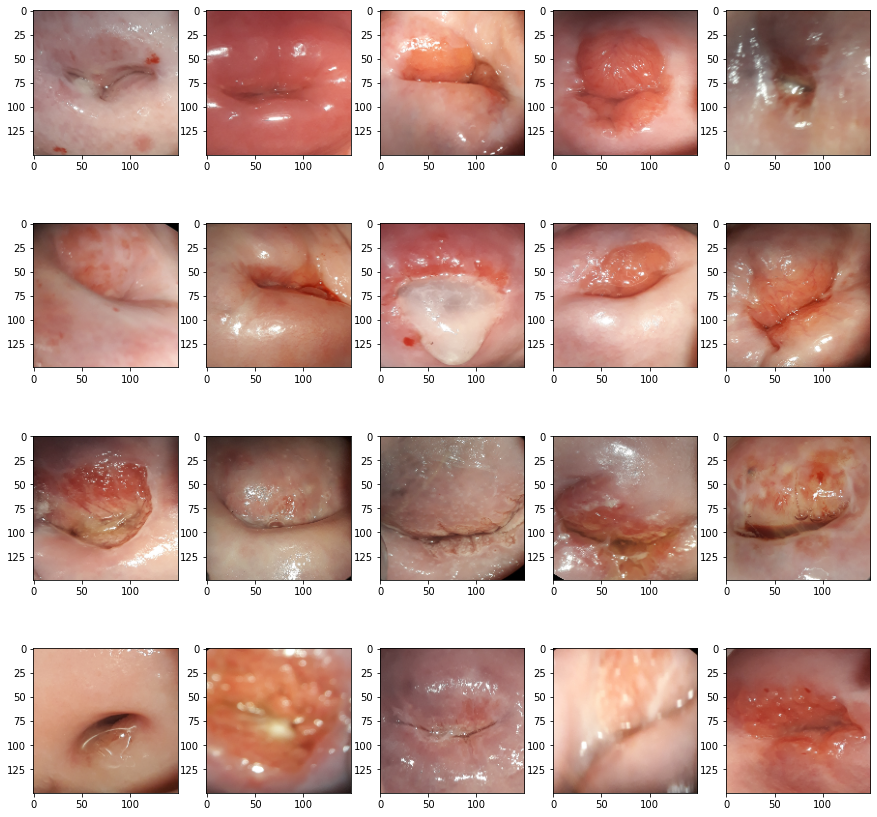

In [9]:
fig, axs = plt.subplots(4,5,figsize=(15,15)) 

paths=negative.image_paths.values.tolist()
i=0
x=0
y=0
while i < 20:
    # try:
    img = cv2.imread(paths[i])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img_416 = cv2.resize(img,(416,416))/255.
    b=localization_model.predict(np.expand_dims(img_416,0))
    v=non_max_suppression(b)
    xyxy=(v[0][:4]*1024).astype('int')
    img_cropped = img[xyxy[1]:xyxy[3],xyxy[0]:xyxy[2]]
    img_224 = cv2.resize(img_cropped,(150,150))

    if y>4:
        x+=1
        y=0
    axs[x,y].imshow(img_224)
    y+=1    
    i+=1
    # except:
    #     i+=1
plt.show()

/tmp/ipykernel_5722/3545685195.py:25: RuntimeWarning: Mean of empty slice.
  img_224[indx_[0][ii],indx_[1][ii]]=i1.mean((0,1)).astype('int')
/home/phillip/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


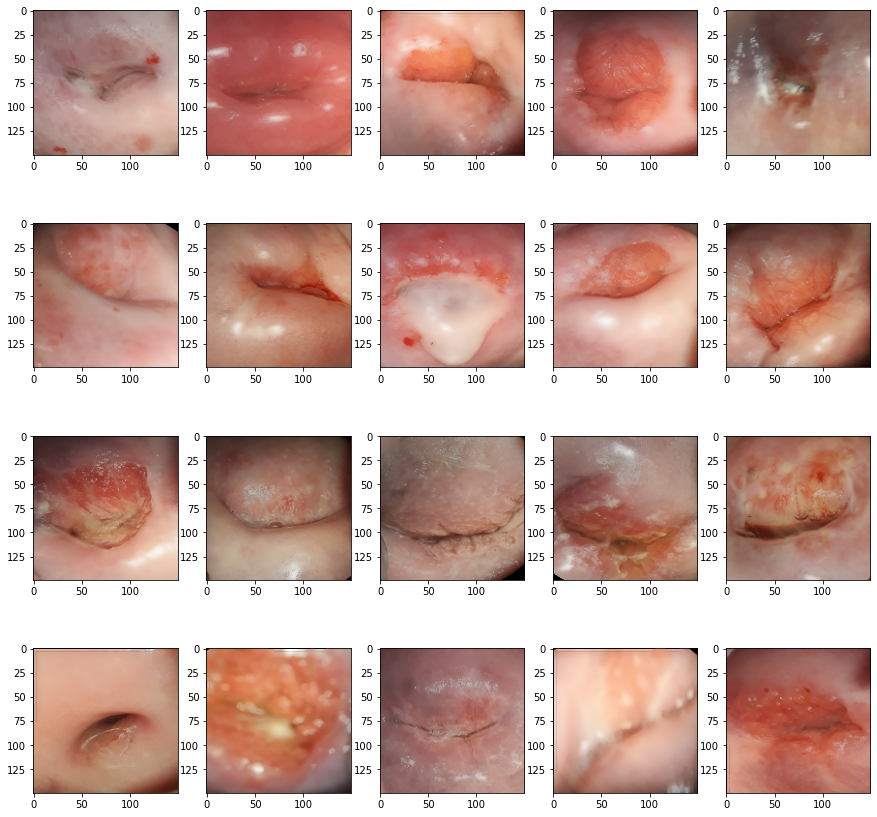

In [10]:
# ploting specular highlight free negative images 
fig, axs = plt.subplots(4,5,figsize=(15,15)) 

paths=negative.image_paths.values.tolist()
i=0
x=0
y=0
while i < 20:
    try:
        img = cv2.imread(paths[i])
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img_416 = cv2.resize(img,(416,416))/255.
        b=localization_model.predict(np.expand_dims(img_416,0))
        v=non_max_suppression(b)
        xyxy=(v[0][:4]*1024).astype('int')
        img_cropped = img[xyxy[1]:xyxy[3],xyxy[0]:xyxy[2]]
        img_224 = cv2.resize(img_cropped,(150,150))

        lab = cv2.cvtColor(img_224,cv2.COLOR_RGB2Lab)
        indx_=np.where(lab[:,:,0]>[180])
    #     img_224[indx_] =[173, 139, 132]
    #     img_224[indx_] =img_224.mean((0,1))
        for ii in range(len(indx_[0])):
            i1=img_224[abs(indx_[0][ii]-3):abs(indx_[0][ii]+3),abs(indx_[1][ii]-3):abs(indx_[1][ii]+3)]
            img_224[indx_[0][ii],indx_[1][ii]]=i1.mean((0,1)).astype('int')



        if y>4:
            x+=1
            y=0
        axs[x,y].imshow(img_224)
        y+=1    
        i+=1
    except:
        i+=1
plt.show()

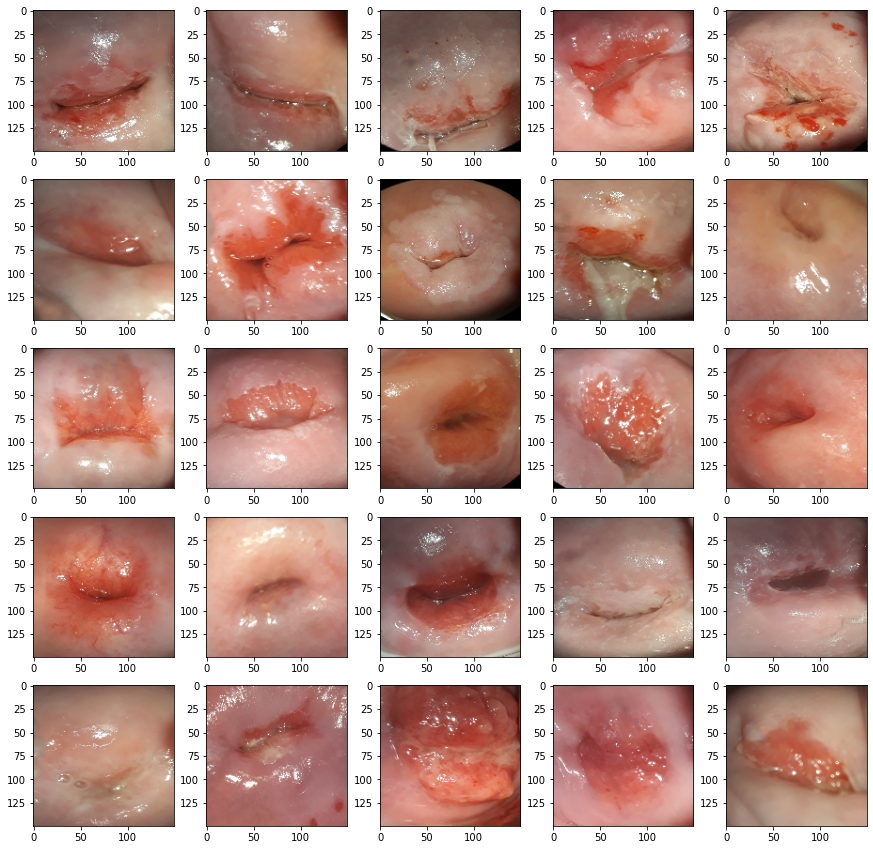

In [11]:
# ploting positive images

fig, axs = plt.subplots(5,5,figsize=(15,15)) 

paths=positive.image_paths.values.tolist()
i=0
x=0
y=0
while i < 25:
    try:
        img = cv2.imread(paths[i])
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img_416 = cv2.resize(img,(416,416))/255.
        b=localization_model.predict(np.expand_dims(img_416,0))
        v=non_max_suppression(b)
        xyxy=(v[0][:4]*1024).astype('int')
        img_cropped = img[xyxy[1]:xyxy[3],xyxy[0]:xyxy[2]]
        img_224 = cv2.resize(img_cropped,(150,150))

        if y>4:
            x+=1
            y=0
        axs[x,y].imshow(img_224)
        y+=1    
        i+=1
    except:i+=1
    
plt.show()
    

/tmp/ipykernel_5722/2591681229.py:26: RuntimeWarning: Mean of empty slice.
  img_224[indx_[0][ii],indx_[1][ii]]=i1.mean((0,1)).astype('int')


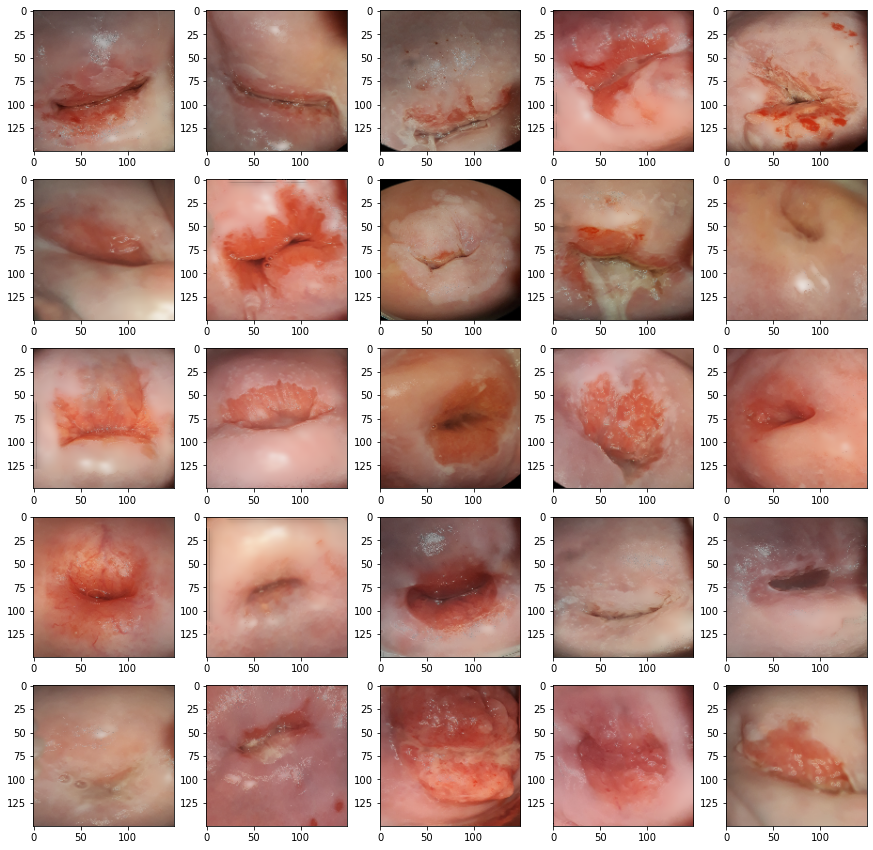

In [12]:
# ploting specular highlight free positive images 
fig, axs = plt.subplots(5,5,figsize=(15,15)) 

paths=positive.image_paths.values.tolist()
i=0
x=0
y=0
while i < 25:
    try:
        img = cv2.imread(paths[i])
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img_416 = cv2.resize(img,(416,416))/255.
        b=localization_model.predict(np.expand_dims(img_416,0))
        v=non_max_suppression(b)
        xyxy=(v[0][:4]*1024).astype('int')
        img_cropped = img[xyxy[1]:xyxy[3],xyxy[0]:xyxy[2]]
        img_224 = cv2.resize(img_cropped,(150,150))

        lab = cv2.cvtColor(img_224,cv2.COLOR_RGB2Lab)
        indx_=np.where(lab[:,:,0]>[180])
#         img_224[indx_] =[173, 139, 132]
#         img_224[indx_] =img_224.mean((0,1))
        for _ in range(2):
            for ii in range(len(indx_[0])):
                i1=img_224[abs(indx_[0][ii]-3):abs(indx_[0][ii]+3),abs(indx_[1][ii]-3):abs(indx_[1][ii]+3)]
                img_224[indx_[0][ii],indx_[1][ii]]=i1.mean((0,1)).astype('int')

        
        if y>4:
            x+=1
            y=0
        axs[x,y].imshow(img_224)
        y+=1    
        i+=1
    except:i+=1
    
plt.show()

In [13]:
train_dataframe = pd.concat([
                             negative,
                             positive])
from sklearn.utils import shuffle
train_dataframe = shuffle(train_dataframe)

In [14]:
train_dataframe

,image_paths,classes
82,/home/phillip/work/cvc2/data7/train/positive/U...,1
812,/home/phillip/work/cvc2/data7/train/positive/M...,1
7,/home/phillip/work/cvc2/data7/train/negative/M...,0
186,/home/phillip/work/cvc2/data7/train/positive/M...,1
376,/home/phillip/work/cvc2/data7/train/negative/M...,0
...,...,...
895,/home/phillip/work/cvc2/data7/train/positive/M...,1
619,/home/phillip/work/cvc2/data7/train/negative/M...,0
620,/home/phillip/work/cvc2/data7/train/negative/M...,0
740,/home/phillip/work/cvc2/data7/train/positive/M...,1


In [15]:
train_dataframe=train_dataframe.reset_index().drop('index',axis=1)

In [16]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
train_dataframe['fold'] = -1
for i, (train_idx,val_idx) in enumerate(skf.split(train_dataframe,train_dataframe.classes.values.tolist())):
    train_dataframe.loc[val_idx,'fold']=i
                                        

In [17]:
train_dataframe

,image_paths,classes,fold
0,/home/phillip/work/cvc2/data7/train/positive/U...,1,0
1,/home/phillip/work/cvc2/data7/train/positive/M...,1,0
2,/home/phillip/work/cvc2/data7/train/negative/M...,0,0
3,/home/phillip/work/cvc2/data7/train/positive/M...,1,0
4,/home/phillip/work/cvc2/data7/train/negative/M...,0,0
...,...,...,...
1804,/home/phillip/work/cvc2/data7/train/positive/M...,1,4
1805,/home/phillip/work/cvc2/data7/train/negative/M...,0,4
1806,/home/phillip/work/cvc2/data7/train/negative/M...,0,4
1807,/home/phillip/work/cvc2/data7/train/positive/M...,1,4


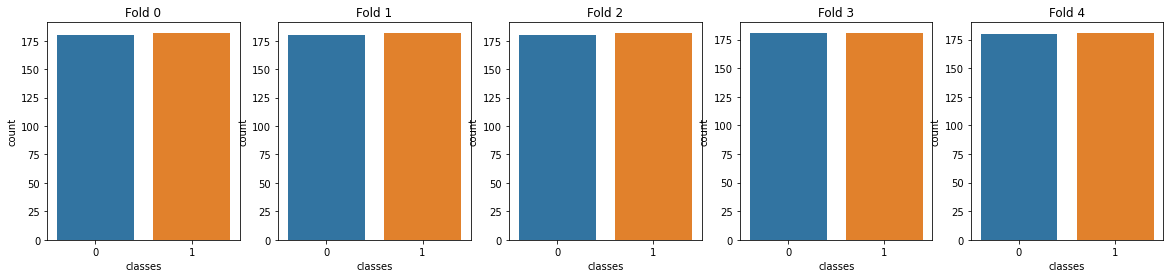

In [18]:
fig,axes=plt.subplots(1,5,figsize=(20,4))
for i in range(5):
    to_plot = train_dataframe[train_dataframe.fold==i]
    sns.countplot(ax=axes[i],x='classes',data=to_plot)
    axes[i].set_title("Fold {}".format(i))
plt.show()

In [19]:
class TrainDataset(tf.data.Dataset):


    def _generator(fold):
        train = train_dataframe[train_dataframe.fold!=fold]
        paths=train.image_paths.values.tolist()
        classes = train.classes.values.tolist()
        pred_boxes=[]
        true_boxes=[]
        i=0
        while i < len(paths):
            try:
                img = cv2.imread(paths[i])
                img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                img_416 = cv2.resize(img,(416,416))/255.
                b=localization_model.predict(np.expand_dims(img_416,0))
                v=non_max_suppression(b)
                xyxy=(v[0][:4]*1024).astype('int')

                img_cropped = img[xyxy[1]:xyxy[3],xyxy[0]:xyxy[2]]
                img_224 = cv2.resize(img_cropped,(224,224))

                lab = cv2.cvtColor(img_224,cv2.COLOR_RGB2Lab)
                indx_=np.where(lab[:,:,0]>[180])
        #         img_224[indx_] =[173, 139, 132]
        #         img_224[indx_] =img_224.mean((0,1))
                
                for ii in range(len(indx_[0])):
                    i1=img_224[abs(indx_[0][ii]-2):abs(indx_[0][ii]+2),abs(indx_[1][ii]-2):abs(indx_[1][ii]+2)]
                    img_224[indx_[0][ii],indx_[1][ii]]=i1.mean((0,1)).astype('float32')


                img_224 = tf.keras.applications.efficientnet.preprocess_input(img_224)
                # img_224 = tf.expand_dims(img_224,axis=0)
                yield (img_224, tf.keras.utils.to_categorical(np.array(classes[i]),2)), tf.keras.utils.to_categorical(np.array(classes[i]),2)
                i+=1
            except:
                i+=1

    def __new__(cls,fold):
        return tf.data.Dataset.from_generator(
            cls._generator,
            output_types=((tf.float32,tf.float32),tf.float32),
            output_shapes=(((224,224,3),(2)),(2)),
            args=(fold,)

        )


class ValidationDataset(tf.data.Dataset):


    def _generator(fold):
        train = train_dataframe[train_dataframe.fold==fold]
        paths=train.image_paths.values.tolist()
        classes = train.classes.values.tolist()
        pred_boxes=[]
        true_boxes=[]
        i=0
        while i < len(paths):
            try:
                img = cv2.imread(paths[i])
                img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                img_416 = cv2.resize(img,(416,416))/255.
                b=localization_model.predict(np.expand_dims(img_416,0))
                v=non_max_suppression(b)
                xyxy=(v[0][:4]*1024).astype('int')

                img_cropped = img[xyxy[1]:xyxy[3],xyxy[0]:xyxy[2]]
                img_224 = cv2.resize(img_cropped,(224,224))

                lab = cv2.cvtColor(img_224,cv2.COLOR_RGB2Lab)
                indx_=np.where(lab[:,:,0]>[180])
        #         img_224[indx_] =[173, 139, 132]
        #         img_224[indx_] =img_224.mean((0,1))
                
                for ii in range(len(indx_[0])):
                    i1=img_224[abs(indx_[0][ii]-2):abs(indx_[0][ii]+2),abs(indx_[1][ii]-2):abs(indx_[1][ii]+2)]
                    img_224[indx_[0][ii],indx_[1][ii]]=i1.mean((0,1)).astype('int')


                img_224 = tf.keras.applications.efficientnet.preprocess_input(img_224)
                
                yield (img_224, tf.keras.utils.to_categorical(np.array(classes[i]),2)),tf.keras.utils.to_categorical(np.array(classes[i]),2)
                i+=1
            except:
                i+=1

    def __new__(cls,fold):
        return tf.data.Dataset.from_generator(
            cls._generator,
            output_types=((tf.float32,tf.float32),tf.float32),
            output_shapes=(((224,224,3),(2)),(2)),
            args=(fold,)

        )

In [20]:
class GeM(tf.keras.layers.Layer):
    def __init__(self,p=3.):
        super(GeM,self).__init__()
        self.epsilon = tf.keras.backend.epsilon()
        self.init_p = p

    def build(self,input_shape):
        self.shape=input_shape
        self.p = self.add_weight(initializer=tf.keras.initializers.Constant(value=self.init_p),
                                  regularizer=None,
                                  trainable=True,
                                  dtype=tf.float32)

        # print(self.shape)
        
    def call(self,inputs):
        inputs = tf.clip_by_value(inputs,self.epsilon,tf.keras.backend.max(inputs))
        

        avg_pool= tf.keras.layers.AveragePooling2D(pool_size=(self.shape[1],self.shape[2]))(inputs)
    
        avg_pool= tf.pow(avg_pool,1/self.p)
        print(avg_pool.shape)
#         avg_pool=tf.reshape(avg_pool,)
        print(avg_pool.shape)
        return avg_pool


In [31]:
class ArcFaceLayer(tf.keras.layers.Layer):
    def __init__(self,num_classes=2,margin=0.05,s=30):
        super(ArcFaceLayer,self).__init__()
        self.num_classes = num_classes
        self.eps=tf.keras.backend.epsilon()
        self.margin = margin
        self.s = s

    def build(self,input_shape):
        x_shape,y_shape=input_shape
       

        self.w = self.add_weight(
            name='arcface_weights',
            shape = (x_shape[-1],self.num_classes),
            initializer='glorot_uniform',
            trainable=True
        )
        super(ArcFaceLayer, self).build(input_shape)

    def call(self,inputs):
        x,y = inputs
        
        x = tf.nn.l2_normalize(x,axis=1)
        w = tf.nn.l2_normalize(self.w,axis=0)
        logits = tf.matmul(x,w)
        theta = tf.acos(tf.clip_by_value(logits,-1+self.eps,1-self.eps))
        target_logits = tf.cos(theta+self.margin)
        logits = logits*(1-y) + target_logits*y
        logits *= self.s
        return tf.nn.softmax(logits)


In [32]:
class CustomModel(tf.keras.Model):
    def __init__(self):
        super(CustomModel,self).__init__()
        self.backbone=tf.keras.applications.EfficientNetB0(input_shape=(224,224,3),
                                     weights='imagenet',
                                     include_top=False)
        self.backbone.trainable=False
        self.class_input= tf.keras.layers.Input((2,))
#         self.gem = GeM()
        self.glb = tf.keras.layers.GlobalAveragePooling2D()
        self.dropout = tf.keras.layers.Dropout(0.6)
        self.arcface_layer = ArcFaceLayer()
        # self.arcface_layer =tf.keras.layers.Dense(2, activation='softmax')
    
        self.out_ = self.call([self.backbone.input,self.class_input])

    # def build(self,input_shape):
    #     print(input_shape)

    
    def call(self,inputs):
        x,y = inputs
        x = self.backbone(x)
        x = self.glb(x)    
        x = self.dropout(x)
        out =  self.arcface_layer([x,y])
        
        return out




In [33]:
model=CustomModel()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
tb_callback=tf.keras.callbacks.TensorBoard(log_dir='/home/phillip/work/cvc2/logs')
train_data = TrainDataset(0).batch(16)
val_data = ValidationDataset(0).batch(16)

2022-04-01 12:04:06.471579: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-04-01 12:04:06.471626: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-04-01 12:04:06.471700: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-04-01 12:04:06.471726: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


In [ ]:
model.fit(train_data,
          validation_data=val_data,
          epochs=20,
          callbacks=[tb_callback]
          )

Epoch 1/20


/tmp/ipykernel_5722/445797737.py:30: RuntimeWarning: Mean of empty slice.
  img_224[indx_[0][ii],indx_[1][ii]]=i1.mean((0,1)).astype('float32')


      1/Unknown - 9s 9s/step - loss: 1.7924 - accuracy: 0.0000e+00

2022-04-01 12:04:16.314523: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-04-01 12:04:16.314580: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-04-01 12:04:16.314677: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED


      2/Unknown - 14s 4s/step - loss: 1.7861 - accuracy: 0.0156   

2022-04-01 12:04:20.567286: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-04-01 12:04:20.649958: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-04-01 12:04:20.673875: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-04-01 12:04:20.702995: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /home/phillip/work/cvc2/logs/train/plugins/profile/2022_04_01_12_04_20
2022-04-01 12:04:20.724019: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /home/phillip/work/cvc2/logs/train/plugins/profile/2022_04_01_12_04_20/xtend-mackvm.trace.json.gz
2022-04-01 12:04:20.806853: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /home/phillip/work/cvc2/logs/train/plugins/profile/2022_04_01_12_04_20
2022-04-01 12:04:20.8

     46/Unknown - 173s 4s/step - loss: 1.7477 - accuracy: 0.0837

Exception ignored in: <generator object TrainDataset._generator at 0x7f26a25a3970>
Traceback (most recent call last):
  File "/home/phillip/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/data/ops/dataset_ops.py", line 727, in iterator_completed
    del self._iterators[iterator_id]
RuntimeError: generator ignored GeneratorExit


     90/Unknown - 331s 4s/step - loss: 1.7423 - accuracy: 0.0863

/tmp/ipykernel_5722/445797737.py:79: RuntimeWarning: Mean of empty slice.
  img_224[indx_[0][ii],indx_[1][ii]]=i1.mean((0,1)).astype('int')


90/90 [==============================] - 410s 5s/step - loss: 1.7419 - accuracy: 0.0864 - val_loss: 1.5971 - val_accuracy: 0.1955
Epoch 2/20
90/90 [==============================] - 398s 4s/step - loss: 1.5885 - accuracy: 0.1337 - val_loss: 1.5888 - val_accuracy: 0.2654
Epoch 3/20
90/90 [==============================] - 388s 4s/step - loss: 1.5675 - accuracy: 0.1949 - val_loss: 1.5873 - val_accuracy: 0.2933
Epoch 4/20
90/90 [==============================] - 369s 4s/step - loss: 1.5300 - accuracy: 0.1981 - val_loss: 1.5901 - val_accuracy: 0.2961
Epoch 5/20
90/90 [==============================] - 367s 4s/step - loss: 1.5336 - accuracy: 0.2120 - val_loss: 1.5606 - val_accuracy: 0.3156
Epoch 6/20
90/90 [==============================] - 366s 4s/step - loss: 1.4974 - accuracy: 0.2143 - val_loss: 1.5942 - val_accuracy: 0.3240
Epoch 7/20
90/90 [==============================] - 362s 4s/step - loss: 1.4795 - accuracy: 0.2341 - val_loss: 1.5419 - val_accuracy: 0.3324
Epoch 8/20
90/90 [======